<a href="https://colab.research.google.com/github/DJIbay/Physics191/blob/probset/191PS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Item 4

N	Rejectability Threshold (z)
5	1.28
10	1.64
15	1.83
20	1.96
50	2.33
100	2.58
200	2.81
1000	3.29


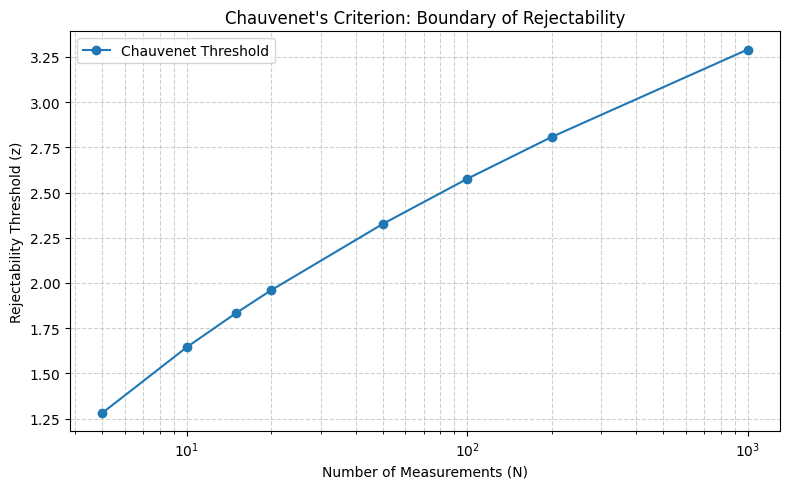

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# List of sample sizes
N_values = [5, 10, 15, 20, 50, 100, 200, 1000]

# Compute rejectability threshold z for each N
z_values = [norm.isf(1 / (2 * N)) for N in N_values]

# Print table
print("N\tRejectability Threshold (z)")
for N, z in zip(N_values, z_values):
    print(f"{N}\t{z:.2f}")

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(N_values, z_values, 'o-', label='Chauvenet Threshold')
plt.xscale('log')
plt.xlabel("Number of Measurements (N)")
plt.ylabel("Rejectability Threshold (z)")
plt.title("Chauvenet's Criterion: Boundary of Rejectability")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Item 6

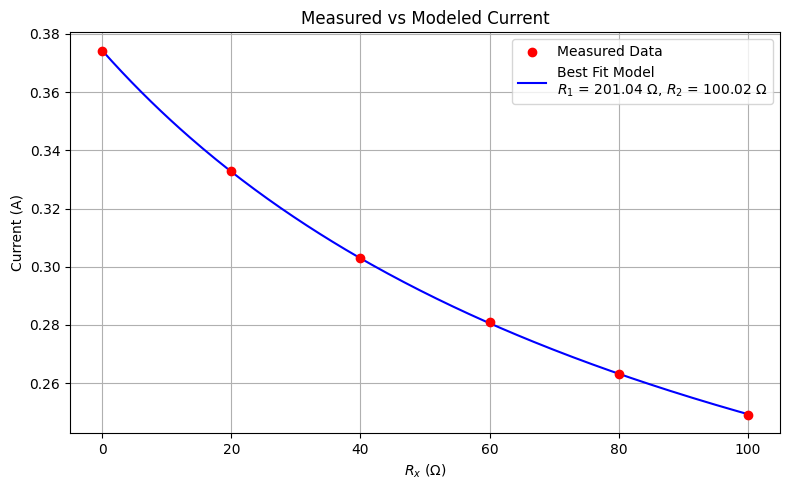

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.utils import resample

# Given data
Rx = np.array([0, 20, 40, 60, 80, 100])
I = np.array([0.374, 0.333, 0.303, 0.281, 0.263, 0.249])
V = 25  # volts

# Model for circuit: R1 in parallel with (R2 + Rx)
def circuit(Rx, R1, R2):
    return V * (1/R1 + 1/(R2 + Rx))

# Fit the model
popt, _ = curve_fit(circuit, Rx, I, p0=[50, 50])
R1, R2 = popt

# Bootstrap for confidence intervals
n_iterations = 1000
params_bootstrap = []

for _ in range(n_iterations):
    Rx_resampled, I_resampled = resample(Rx, I)
    try:
        popt_resample, _ = curve_fit(circuit, Rx_resampled, I_resampled, p0=[50, 50])
        params_bootstrap.append(popt_resample)
    except RuntimeError:
        continue

params_bootstrap = np.array(params_bootstrap)
R1_corr_ci = np.percentile(params_bootstrap[:, 0], [2.5, 97.5])
R2_corr_ci = np.percentile(params_bootstrap[:, 1], [2.5, 97.5])

# Plotting
Rx_values = np.linspace(0, 100, 200)
I_model = circuit(Rx_values, R1, R2)

plt.figure(figsize=(8, 5))
plt.scatter(Rx, I, color='red', label='Measured Data', zorder=3)
plt.plot(Rx_values, I_model, label=f'Best Fit Model\n$R_1$ = {R1:.2f} Ω, $R_2$ = {R2:.2f} Ω', color='blue')
plt.xlabel(r'$R_x$ (Ω)')
plt.ylabel('Current (A)')
plt.title('Measured vs Modeled Current')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()